# Data Lifecycle – From Collecting to Archiving

## 1. Data Loading

Required libraries are imported, and the dataset is loaded into a pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("unclean_data/unclean_smartwatch_health_data.csv")

## 2. Inspecting Data

This section focuses on exploring the raw dataset: its structure, missing values, and duplicates are examined. The aim is to assess data consistency and completeness before further processing and cleaning.

In [2]:
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


The dataset consists of 10,000 rows (as shown by the RangeIndex), but none of the columns are fully complete.

In [4]:
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': null_counts,
    'Missing (%)': null_percent.round(2)
})

print(missing_data)

                        Missing Values  Missing (%)
User ID                            201         2.01
Heart Rate (BPM)                   400         4.00
Blood Oxygen Level (%)             300         3.00
Step Count                         100         1.00
Sleep Duration (hours)             150         1.50
Activity Level                     200         2.00
Stress Level                       200         2.00


This table shows the exact number and percentage of missing values in each column. All columns contain some missing values, but the proportion is relatively low - ranging from 1% to 4%.

In [5]:
print(df.duplicated().sum())

0


The dataset does not contain any duplicated rows, which means no further action regarding duplicates is necessary.

## 3. Data Cleaning

In this section, the dataset is cleaned to ensure overall data quality.
* At the beginning, rows with missing user identifiers are removed, as they cannot be reliably linked to individual records. Additionally, the User ID data type is converted from float to integer, as this format is more appropriate for an identifier.
* Next, basic statistics are examined to identify anomalies, inconsistencies, or unusual values that may require correction.
* Then, each column is analyzed individually to apply more specific cleaning steps based on the type and nature of the data.

In [6]:
df_clean = df.dropna(subset=['User ID']).reset_index(drop=True).copy()

In [7]:
df_clean['User ID'] = df_clean['User ID'].astype(int)

In [8]:
df_clean.describe(include='all')

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
count,9799.000000,9405.000000,9503.000000,9701.000000,9654,9602,9603
unique,NaN,NaN,NaN,NaN,9415,6,11
top,NaN,NaN,NaN,NaN,ERROR,Seddentary,2
freq,NaN,NaN,NaN,NaN,240,1639,992
mean,3007.480253,76.026305,97.844952,7002.117395,NaN,NaN,NaN
std,1150.581542,19.386211,1.730815,6908.154798,NaN,NaN,NaN
min,1001.000000,40.000000,90.791208,0.910138,NaN,NaN,NaN
25%,1997.500000,64.914467,96.666721,2021.265126,NaN,NaN,NaN
50%,2998.000000,75.208240,98.014441,4977.574718,NaN,NaN,NaN
75%,4004.000000,85.239576,99.374389,9750.114078,NaN,NaN,NaN


## a) Categorical columns
Categorical columns are first reviewed by checking the current number of missing values and inspecting unique entries in each column.

### Activity Level

In [9]:
print(df_clean['Activity Level'].isnull().sum())

197


In [10]:
df_clean['Activity Level'].unique()

array(['Highly Active', 'Actve', 'Highly_Active', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

In [11]:
df_clean['Activity Level'] = df_clean['Activity Level'].replace({
    'Actve': 'Active',
    'Highly_Active': 'Highly Active',
    'Seddentary': 'Sedentary'
})

In [12]:
df_clean['Activity Level'] = df_clean['Activity Level'].fillna('Unknown')

**Summary:** The column contained 197 missing values and some misspelled categories, which were corrected.
Missing values were filled with the label 'Unknown' due to the lack of information on how activity levels were originally assigned.

### Stress Level

In [13]:
print(df_clean['Stress Level'].isnull().sum())

196


In [14]:
df_clean['Stress Level'].unique()

array(['1', '5', '3', '6', '10', '2', '8', '9', nan, '4', 'Very High',
       '7'], dtype=object)

In [15]:
df_clean['Stress Level'] = df_clean['Stress Level'].replace('Very High', '10')
df_clean['Stress Level'] = pd.to_numeric(df_clean['Stress Level'], errors='coerce')

In [16]:
df_clean['Stress Level'] = df_clean['Stress Level'].fillna(df_clean['Stress Level'].median())

In [17]:
df_clean['Stress Level'] = df_clean['Stress Level'].astype(int)

**Summary:** The column contained 196 missing values. One of the text labels 'Very high', was replaced with the numerical value '10'.
The column was then converted to a numeric type, and missing values were imputed using the median. Finally, the entire column was cast to the integer type to match the expected format.

## b) Numerical columns
Numerical columns are analyzed by checking the number of missing values, visualizing distributions using boxplots, and calculating the interquartile range (IQR) to detect potential outliers.

In [18]:
def show_boxplot(df, column):
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [19]:
def detect_outliers_iqr(df, column, verbose=True):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]

    if verbose:
        print(f"Column: {column}")
        print(f"Lower bound: {lower}")
        print(f"Upper bound: {upper}")
        print(f"Number of outliers: {outliers.shape[0]}")

    return outliers, lower, upper

### Heart Rate

In [20]:
print(df_clean['Heart Rate (BPM)'].isnull().sum())

394


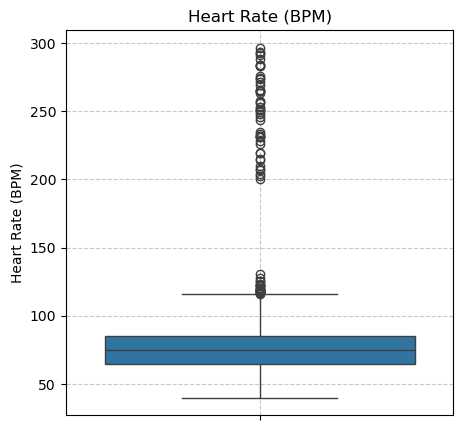

In [21]:
show_boxplot(df_clean, 'Heart Rate (BPM)')

In [22]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'Heart Rate (BPM)')

Column: Heart Rate (BPM)
Lower bound: 34.4268039770686
Upper bound: 115.72723878397628
Number of outliers: 71


In [23]:
print((df_clean['Heart Rate (BPM)'] > 220).sum())

38


In [24]:
df_clean = df_clean[
    (df_clean['Heart Rate (BPM)'] <= 220) | (df_clean['Heart Rate (BPM)'].isna())
]

In [25]:
df_clean['Heart Rate (BPM)'] = df_clean['Heart Rate (BPM)'].fillna(df_clean['Heart Rate (BPM)'].median())

In [26]:
df_clean['Heart Rate (BPM)'] = df_clean['Heart Rate (BPM)'].astype(int)

**Summary:** The column contained 394 missing values. IQR analysis identified 71 outliers. Records with unnaturally high values (above 220 BPM), considered physiologically impossible, were removed. Missing values were imputed using the median. The column was then cast to integer type, as heart rate is typically reported as a whole number.

### Blood Oxygen Level

In [27]:
print(df_clean['Blood Oxygen Level (%)'].isnull().sum())

294


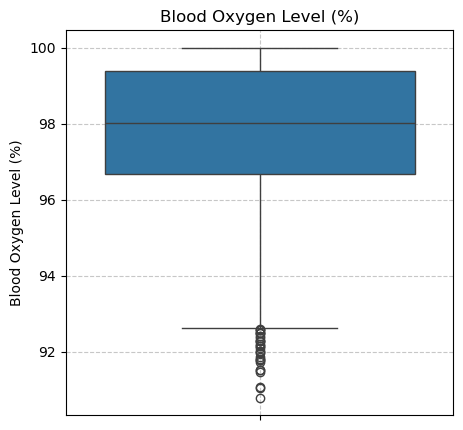

In [28]:
show_boxplot(df_clean, 'Blood Oxygen Level (%)')

In [29]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'Blood Oxygen Level (%)')

Column: Blood Oxygen Level (%)
Lower bound: 92.60546113250149
Upper bound: 103.43863409274815
Number of outliers: 29


In [30]:
df_clean['Blood Oxygen Level (%)'] = df_clean['Blood Oxygen Level (%)'].fillna(df_clean['Blood Oxygen Level (%)'].median())

In [31]:
df_clean['Blood Oxygen Level (%)'] = df_clean['Blood Oxygen Level (%)'].round(1)

**Summary:** The column contained 294 missing values. IQR analysis identified 29 outliers. Values below 95% may indicate hypoxemia, which could reflect rare but real conditions. For this reason, no outliers were removed. Missing values were imputed using the mean. Values were rounded to one decimal place for consistency and readability.

### Step Count

In [32]:
print(df_clean['Step Count'].isnull().sum())

97


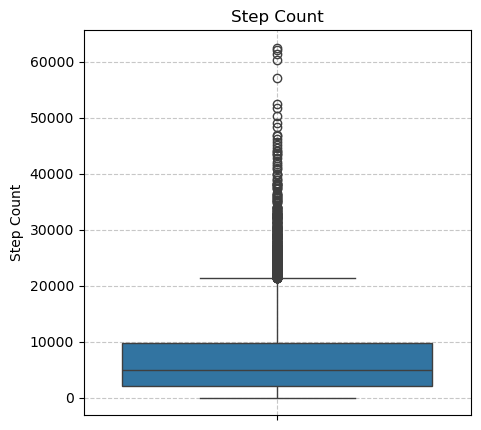

In [33]:
show_boxplot(df_clean, 'Step Count')

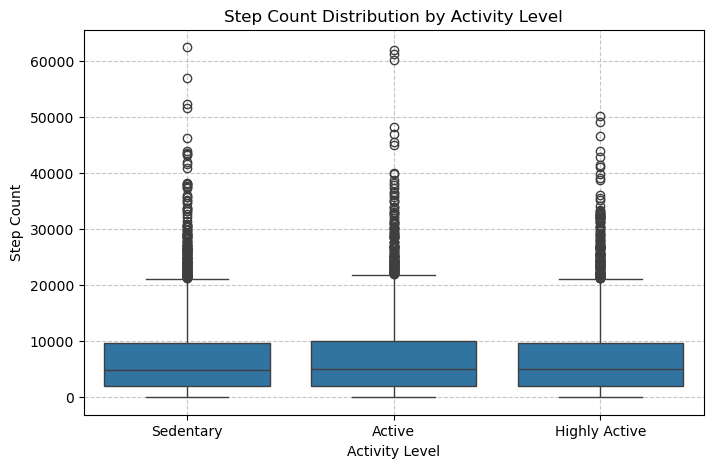

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Activity Level', y='Step Count', data=df_clean, order=['Sedentary', 'Active', 'Highly Active'])
plt.title('Step Count Distribution by Activity Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [35]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'Step Count')

Column: Step Count
Lower bound: -9571.908690545717
Upper bound: 21335.89102849443
Number of outliers: 436


In [36]:
def classify_activity_level(steps):
    if steps < 5000:
        return 'Sedentary'
    elif steps < 7499:
        return 'Low Active'
    elif steps < 9999:
        return 'Active'
    else:
        return 'Highly Active'

df_clean['Activity Level (Steps)'] = df_clean['Step Count'].apply(classify_activity_level)

In [37]:
cols = df_clean.columns.tolist()
i = cols.index('Activity Level')
cols.remove('Activity Level (Steps)')
cols.insert(i + 1, 'Activity Level (Steps)')
df_clean = df_clean[cols]

In [38]:
df_clean = df_clean[
    (df_clean['Step Count'] <= 60000) | (df_clean['Step Count'].isna())
]

In [39]:
df_clean['Step Count'] = df_clean['Step Count'].fillna(df_clean['Step Count'].median())

In [40]:
df_clean['Step Count'] = df_clean['Step Count'].astype(int)

**Summary:** The column contained 97 missing values. IQR analysis identified 436 outliers, including some entries exceeding 60,000 steps per day. Analysis showed weak alignment between Step Count and the original Activity Level column, suggesting that activity level was not based on step data. To improve interpretability, a new classification - Activity Level (Steps) was created based on step count ranges. Only extreme outliers (>60,000) were removed. Missing values were imputed with the median. Finally, the values were cast to integers, as step counts are always whole numbers.

### Sleep Duration

In [41]:
df_clean['Sleep Duration (hours)'] = pd.to_numeric(df_clean['Sleep Duration (hours)'], errors='coerce')

In [42]:
print(df_clean['Sleep Duration (hours)'].isnull().sum())

383


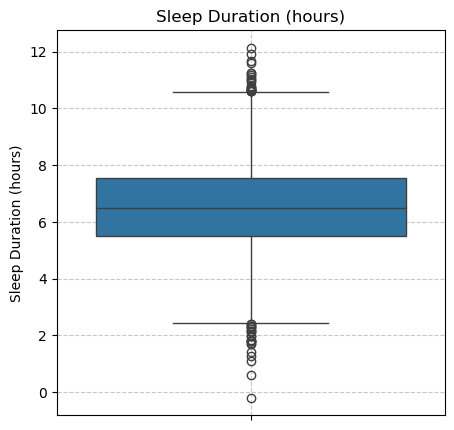

In [43]:
show_boxplot(df_clean, 'Sleep Duration (hours)')

In [44]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'Sleep Duration (hours)')

Column: Sleep Duration (hours)
Lower bound: 2.4269443831955333
Upper bound: 10.5901987261708
Number of outliers: 44


In [45]:
df_clean = df_clean[
    (df_clean['Sleep Duration (hours)'] >= lower_bound) | (df_clean['Sleep Duration (hours)'].isna())
]

In [46]:
df_clean['Sleep Duration (hours)'] = df_clean['Sleep Duration (hours)'].fillna(df_clean['Sleep Duration (hours)'].mean())

In [47]:
df_clean['Sleep Duration (hours)'] = df_clean['Sleep Duration (hours)'].round(1)

**Summary:** The column initially contained non-numeric entries, which were converted to a numeric data type to enable proper analysis. The column contained 383 missing values. IQR analysis identified 44 outliers, including negative values, which are not valid for sleep duration. Only values below the lower bound (2.4 hours) were removed. Missing data was imputed using the mean. Values were rounded to one decimal place to improve readability.

## Cleaning Summary

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9735 entries, 0 to 9798
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9735 non-null   int64  
 1   Heart Rate (BPM)        9735 non-null   int64  
 2   Blood Oxygen Level (%)  9735 non-null   float64
 3   Step Count              9735 non-null   int64  
 4   Sleep Duration (hours)  9735 non-null   float64
 5   Activity Level          9735 non-null   object 
 6   Activity Level (Steps)  9735 non-null   object 
 7   Stress Level            9735 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 684.5+ KB


After applying individual cleaning steps to each column, the dataset was reviewed using df_clean.info() to confirm that all missing values had been addressed and data types were consistent.

For handling missing values:

* The mean was used when the distribution was symmetric and free of extreme outliers.
* The median was preferred in cases of skewed distributions, as it is more robust to extreme values.

Outliers were identified using the Interquartile Range (IQR) method. In most cases, only extreme or clearly invalid values (e.g. negative durations or heart rates exceeding physiological limits) were removed. In other cases, rare values that could still reflect realistic scenarios were retained for analysis.

Additionally, selected columns were cast to integer type where appropriate (e.g. stress level, step count) to reflect their discrete nature. Values in columns such as sleep duration and blood oxygen level were rounded to one decimal place to improve readability and ensure consistent formatting.

The resulting dataset contains complete and cleaned data, ready for analysis.

## 4. Exporting and Archiving Cleaned Data
After cleaning, the processed dataset is saved to a dedicated folder for easy access and future use. Additionally, it is archived into a ZIP file to facilitate sharing and storage.

In [49]:
import zipfile
import os

data_folder = "clean_data"
file_name = "clean_smartwatch_health_data.csv"
archive_file = "smartwatch_health_data_archive.zip"
dst_file = os.path.join(data_folder, file_name)

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

df_clean.to_csv(dst_file, index=False)

with zipfile.ZipFile(archive_file, "w") as zipf:
    zipf.write(dst_file)

## 5. Summary
This project demonstrated the full data lifecycle using smartwatch health data - from importing and inspecting the raw dataset, through detailed cleaning and handling of missing and outlier values, to saving the final cleaned version.